In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [66]:
X,Y = make_classification(n_samples=100,n_features=4)
x = X[:,:2]
x_tr,x_tst,y_tr,y_tst = train_test_split(x,Y,stratify=Y, random_state=1)


In [67]:
M = 100
MLP = MLPClassifier(hidden_layer_sizes=M,activation='relu',max_iter=300)
MLP = MLP.fit(x_tr,y_tr)
y_hat_tst = MLP.predict(x_tst)
print(classification_report(y_tst,y_hat_tst))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.71      1.00      0.83        12

    accuracy                           0.80        25
   macro avg       0.85      0.81      0.79        25
weighted avg       0.86      0.80      0.79        25



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [81]:
x_min,x_max = x[:,0].min()-1,x[:,0].max()+1
y_min,y_max = x[:,0].min()-1,x[:,1].max()+1
h = (x_max-x_min)/100
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
x_plot = np.c_[np.ravel(xx),np.ravel(yy)]
y_plot = MLP.predict(x_plot)
y_plot = y_plot.reshape(xx.shape)

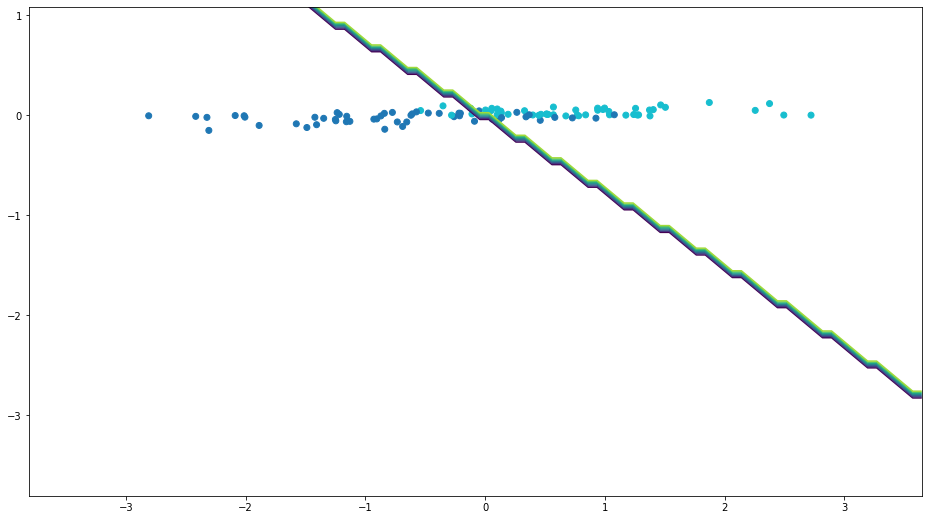

In [82]:
plt.figure(figsize=(16,9))
plt.contour(xx,yy,y_plot)
plt.scatter(x[:,0],x[:,1],c=Y,cmap=plt.cm.tab10)